* La maldición de la dimensión: Esto dice que por cada variable que agrego en el conjunto de datos vamos a necesitar exponencialmente más muestras para poder tener la misma relevancia estadística.
* Cuál es el autovector relacionado con el autovalor más grande? Es el autovalor quien define cual es la dirección que contiene más información.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.random.seed(42)

x = 3*np.random.rand(200)
y = 20*x + 2*np.random.rand(200)

x = x.reshape(200,1)
y = y.reshape(200,1)

In [4]:
xy = np.hstack([x,y])
print(xy.shape)

(200, 2)


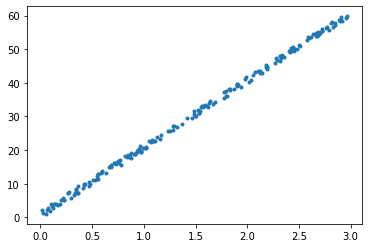

In [5]:
plt.plot(xy[:,0], xy[:,1], '.')
plt.show()

In [7]:
xy_centrado = xy - np.mean(xy, axis=0)

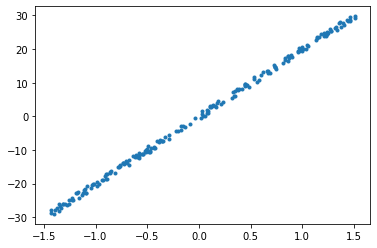

In [9]:
plt.plot(xy_centrado[:,0], xy_centrado[:,1], '.')
plt.show()

In [11]:
autovalores, autovectores = np.linalg.eig(xy_centrado.T.dot(xy_centrado))
print(autovectores)

[[-0.99875285 -0.04992746]
 [ 0.04992746 -0.99875285]]


In [12]:
%run "funciones_auxiliares/graficarVectores.ipynb"

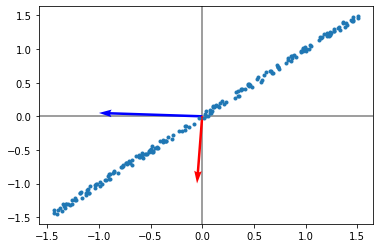

In [15]:
graficarVectores(autovectores.T, ['blue', 'red'])

plt.plot(xy_centrado[:,0], xy_centrado[:,1]/20, '.')

plt.show()

In [16]:
print(autovalores)

[1.70408413e-01 6.24117888e+04]


In [17]:
xy_nuevo = autovectores.T.dot(xy_centrado.T)

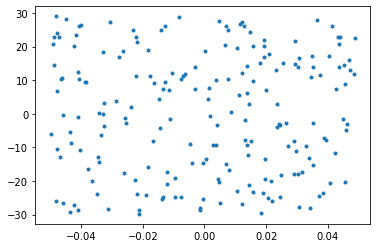

In [19]:
plt.plot(xy_nuevo[0,:], xy_nuevo[1,:], '.')

plt.show()

# Aplicando PCA a imagenes

In [55]:
from sklearn.datasets import fetch_olivetti_faces

In [56]:
data = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\hcapc\scikit_learn_data


In [22]:
import imageio
import pandas as pd

In [61]:
im = imageio.imread("imagenes/S3/3.pgm")
im = im.astype(np.uint8)
print('Max original', end = ' ')
print(np.amax(im))
print('Max original', end = ' ')
print(np.amax(im))

Max original 204
Max original 204


In [26]:
print('Max original', end = ' ')
print(np.amax(im))
print('Max original', end = ' ')
print(np.amax(im))

Max original 204
Max original 204


In [27]:
im_original = im

im = im / 255

print('Max original', end = ' ')
print(np.amax(im))
print('Max original', end = ' ')
print(np.amax(im))

Max original 0.8
Max original 0.8


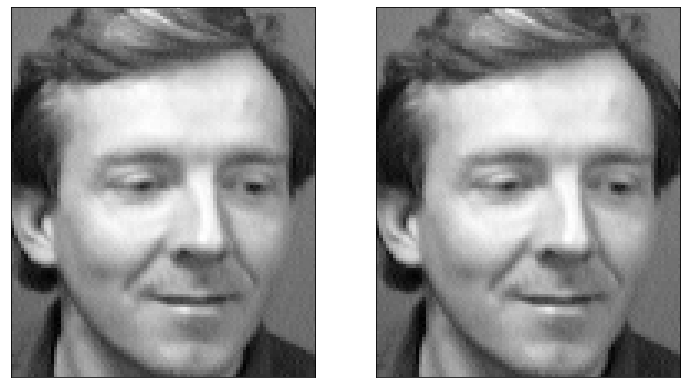

In [29]:
fix, ax = plt.subplots(1,2,figsize=(12,12),
                       subplot_kw = {'xticks' : [], 'yticks':[]}) 

ax[0].imshow(im_original, cmap='gray')
ax[1].imshow(im, cmap='gray')

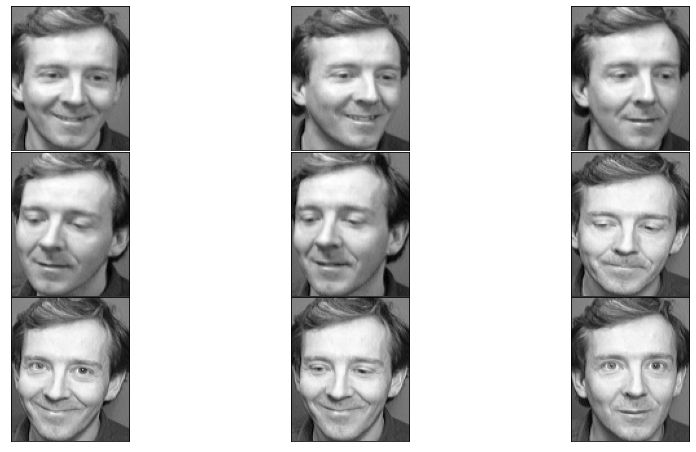

In [40]:
from glob import iglob

caras = pd.DataFrame([])

for path in iglob('imagenes/S3/*.pgm'):
    im = imageio.imread(path)
    cara = pd.Series(im.flatten(), name=path)
    caras = caras.append(cara)
    
fig, axes = plt.subplots(3,3, figsize = (15,8),
                         subplot_kw = {'xticks' : [], 'yticks' : []},
                         gridspec_kw = dict(hspace=0.01, wspace=0.01))

for i, ax in enumerate(axes.flat):
    ax.imshow(caras.iloc[i].values.reshape(112,92),cmap='gray')

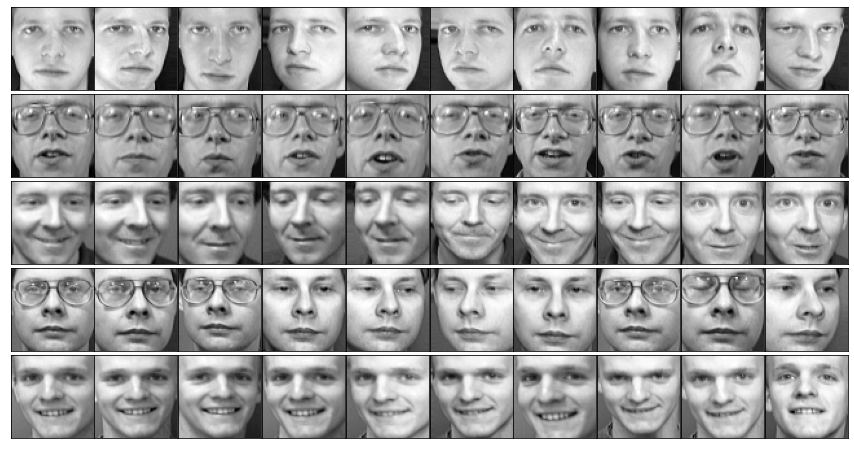

In [71]:
caras = data.data


fig, axes = plt.subplots(5,10, figsize = (15,8),
                         subplot_kw = {'xticks' : [], 'yticks' : []},
                         gridspec_kw = dict(hspace=0.01, wspace=0.01))

for i, ax in enumerate(axes.flat):
    ax.imshow(data.data[i].reshape(64,64),cmap='gray')

In [72]:
from sklearn.decomposition import PCA

In [73]:
caras_pca = PCA(n_components = 0.8)

caras_pca.fit(caras)

PCA(n_components=0.8)

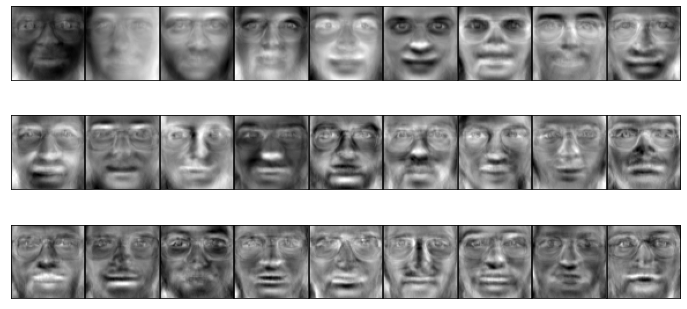

In [78]:
filas = 3
columnas = caras_pca.n_components_ // filas

fig, axes = plt.subplots(filas,columnas, figsize = (12,6),
                         subplot_kw = {'xticks' : [], 'yticks' : []},
                         gridspec_kw = dict(hspace=0.01, wspace=0.01))

for i, ax in enumerate(axes.flat):
    ax.imshow(caras_pca.components_[i].reshape(64,64),cmap='gray')

In [75]:
print(caras_pca.n_components_)

27


In [79]:
componentes = caras_pca.transform(caras)
proyeccion =  caras_pca.inverse_transform(componentes)

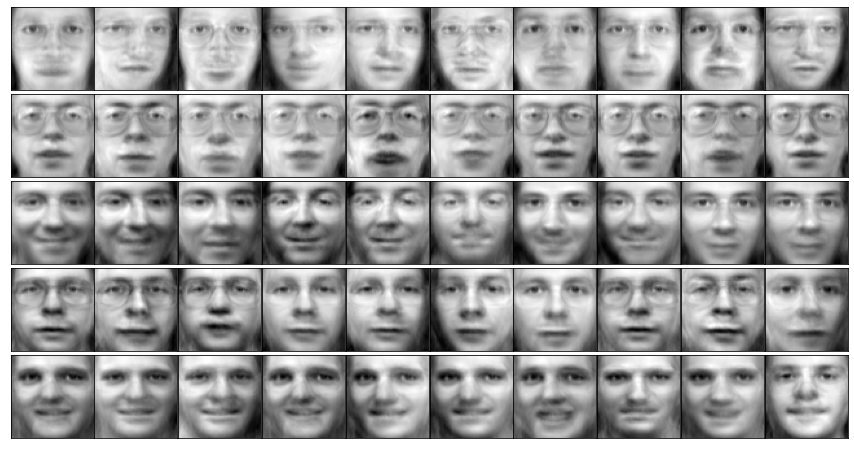

In [81]:
fig, axes = plt.subplots(5,10, figsize = (15,8),
                         subplot_kw = {'xticks' : [], 'yticks' : []},
                         gridspec_kw = dict(hspace=0.01, wspace=0.01))

for i, ax in enumerate(axes.flat):
    ax.imshow(proyeccion[i].reshape(64,64),cmap='gray')